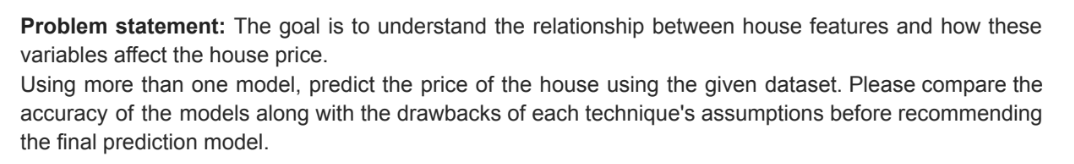

<hr>

In [1]:
#IMPORTING 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [3]:
df=pd.read_excel('House price dataset.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


# Analysis

In [5]:
df.shape    #there are 9 columns and 414 entries

(414, 9)

In [6]:
df.corr()     #Correlation

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


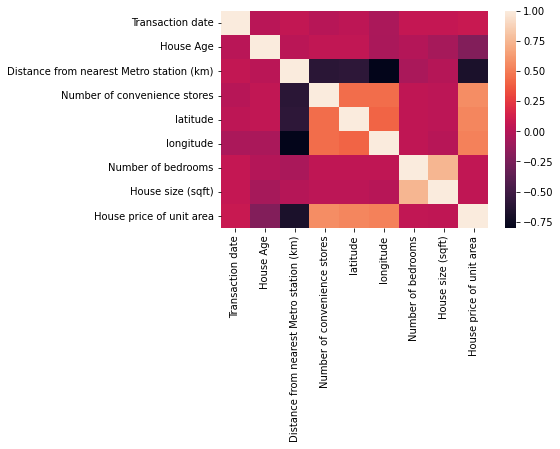

In [7]:
sns.heatmap(df.corr())

The above heatmap shows the correlation the different parameters. We can make a few inferences using this heatmap:

*   There seems to be a negative correlation between 'Number of convenience stores' and 'Distance from nearest Metro station(km)'.
*   There seems to be a correlation between the location(latitude & longitude) of the house and 'Number of convenience stores'.
*   There seems to be a negative correlation between the 'Distance from nearest Metro station(km)' and 'House price of unit area'. This implies that the presence of a metro station affects the price of the house.








Text(0, 0.5, 'House price of unit area')

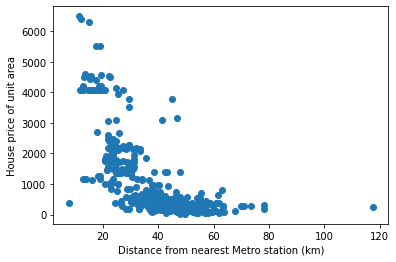

In [8]:
plt.scatter(df['House price of unit area'],df['Distance from nearest Metro station (km)'])   #relation between house price and distance from metro station
plt.xlabel("Distance from nearest Metro station (km)")
plt.ylabel("House price of unit area")

In [9]:
df.isnull().sum()     #checking for null values

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [10]:
df.isna().sum()     #checking for Nan values

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [11]:
df['markers']=pd.cut(df['House price of unit area'], bins=4, labels=['green', 'blue', 'red','orange'])    #colour scheme according to house price

In [12]:
#Visualizing houses using folium maps

import folium
m = folium.Map(location=[24.98298,121.54024],zoom_start=13)


j=0
for i in range((df.shape[0])):
  # print(i,df['longitude'][j])
  # print(df['latitude'][i],df['longitude'][i])
  folium.Marker(location=[df['latitude'][i],df['longitude'][i]],icon=folium.Icon(color=df['markers'][i],icon='home',prefix='fa'),popup=df['House price of unit area'][i]).add_to(m)
#placing houses on map^

m

**Green < Blue < Red < Orange**

This is the order in which the houses are labelled. Green has the lowest price whereas Orange has the highest.

Giving a glimpse to the map, we can see that house prices away from the main city(near the green areas) have a lower house price.

In [13]:
#REMOVE OUTLIERS


In [14]:
#Function to get outlier limits

def remove_outliers(df_r,upper=None,lower=None):
    if (upper==None and lower==None):
        Q1 = np.percentile(df_r, 25,
                   interpolation = 'midpoint')
        Q3 = np.percentile(df_r, 75,
                   interpolation = 'midpoint')
        
        IQR= Q3 - Q1
        
        upper = Q3 + 1.5*IQR

        lower = Q1 - 1.5*IQR
        
        print('Upper: ',upper)
        print('Lower: ',lower)
        
        return upper,lower
    else:
        print('Upper: ',upper)
        print('Lower: ',lower)
        
        return upper,lower

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


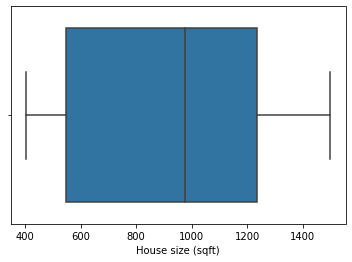

In [15]:
sns.boxplot(df['House size (sqft)'])

On making a box plot for each parameter, we come to the conclusion that there are no significant outliers that would affect our model

In [16]:
#Using Standard scaler to scale the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
model=scaler.fit(df.drop(['Transaction date','markers'],axis=1))

In [18]:
scaled=model.transform(df.iloc[:,1:-1])

In [19]:
scaled=pd.DataFrame(scaled)

In [20]:
X=scaled.drop([7],axis=1)

In [21]:
Y=scaled[7]

Now that we have scaled the features, we can start with creating different models for checking which performs best

# Models

In [22]:
#Import models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [23]:
from sklearn.model_selection import train_test_split    #Used for splitting data into training and testing set

In [24]:
from sklearn.metrics import mean_squared_error

We are using mean squared error as the metric to check which model performs the best.

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

> Linear Regression model



In [26]:
LR=LinearRegression()     #instantiating a Linear Regression model

In [27]:
LR.fit(x_train,y_train)   #fitting our LR model

LinearRegression()

In [28]:
y_pred=LR.predict(x_test)

In [29]:
LR_mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
LR_mse

0.4696715115506201

> Decision Tree Regressor

By changing the parameters we can find a sweet spot for our model


In [30]:
DTR=DecisionTreeRegressor()

In [31]:
DTR.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
y_pred=DTR.predict(x_test)

In [33]:
DTR_mse=mean_squared_error(y_test,y_pred)

In [34]:
DTR_mse

0.4315818324002434

> Random Forest Regressor



In [35]:
RFR=RandomForestRegressor()

In [36]:
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred=RFR.predict(x_test)

In [38]:
RFR_mse=mean_squared_error(y_test,y_pred)

In [39]:
RFR_mse

0.28611749103748946

K-Nearest Neighbour Regressor

In [40]:
KNR=KNeighborsRegressor()

In [41]:
KNR.fit(x_train,y_train)

KNeighborsRegressor()

In [42]:
y_pred=KNR.predict(x_test)

In [43]:
KNR_mse=mean_squared_error(y_test,y_pred)
KNR_mse

0.4617974989516622

> Neural Network



In [44]:
model=tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Dense(128,input_shape=(7,),activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [46]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [47]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
11/11 [==============================] - 3s 20ms/step - loss: 0.9046 - mse: 0.9046
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 0.7063 - mse: 0.7063
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.5867 - mse: 0.5867
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 0.4290 - mse: 0.4290
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 0.3667 - mse: 0.3667
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: 0.3461 - mse: 0.3461
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 0.3313 - mse: 0.3313
Epoch 8/10
11/11 [==============================] - 0s 8ms/step - loss: 0.3290 - mse: 0.3290
Epoch 9/10
11/11 [==============================] - 0s 14ms/step - loss: 0.3146 - mse: 0.3146
Epoch 10/10
11/11 [==============================] - 0s 12ms/step - loss: 0.3014 - mse: 0.3014


In [48]:
y_pred=model.predict(x_test)

3/3 [==============================] - 0s 12ms/step


In [49]:
NN_mse=mean_squared_error(y_test,y_pred)
NN_mse

0.3568910459902137

# Comparison

In [50]:
print("Mean Squared Error for models:")
print("Linear Regression: ",LR_mse)
print("Decision Tree Regression: ",DTR_mse)
print("Random Forest Regression: ",RFR_mse)
print("K-Neighbours Regression: ",KNR_mse)
print("Neural Networks Regression: ",NN_mse)

Mean Squared Error for models:
Linear Regression:  0.4696715115506201
Decision Tree Regression:  0.4315818324002434
Random Forest Regression:  0.28611749103748946
K-Neighbours Regression:  0.4617974989516622
Neural Networks Regression:  0.3568910459902137


From the above results, we can see that Random Forest Regression gives us the least MSE. We can use Random Forest for creating a model which will predict the house price for us. 

*   Linear Regression: There are many assumptions we have to make about the data before we use linear regression. This means that if our assumptions turn out to be untrue for our data, then the model won't fit well.

*   Decision Tree Regression: They are quite robust and pretty much unaffected by outliers and null values. However, they are computationally expensive and time consuming to train them, especially when depth of the tree is more. It also tends to overfit.

*   Random Forest Regression: It helps us to reduce the overfitting problem in decision trees. It is not affected by null values or outliers. However, they are computationally expensive and time-consuming as they use multiple decision trees. 

*   K-neighbours Regression: It is easy to implement as it functions on the idea of calculating distances between data-points. It takes less time for training. However, performance drastically reduces when the dataset size increases or the data has too many dimensions. Data should be normalized. 

*   Neural Network Regression: It can be used to perform really complex tasks and can fit almost any function. This is because neural networks are called to be Universal Function Approximators, implying that they can approximate almost any function. They can process unorganized data too. However, for large datasets, they are very computationally expensive. Hyper-parameter tuning for neural networks is also difficult.


<hr>




**Conclusion**: Considering the pros and cons of all the models used, using Random Forest classifier or a Neural network will be a really good options. This is because, the dataset used is not humongous, and can be easily trained using random forest/NN. Also, random forest and NN are giving the least error among all other models.